In [2]:
# TP 5 - Black-Scholess

import numpy as np
from scipy.stats import binom
from scipy.stats import norm
import matplotlib.pyplot as plt

# paramètres généraux
S0 = 140 # prix initial
T = 1.0 # temps final
K = 140 # strike
r = 0.1 # rendement
sigma = 0.1 # volatilité

In [3]:
# Call Black-Scholes
def CallBS(S0,T,K,r,sigma):
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = (np.log(S0/K)+(r-sigma**2/2)*T)/(sigma*np.sqrt(T))
    C = S0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    return C

In [4]:
CallBS(S0,T,K,r,sigma)

14.431411295888182

In [5]:
# Put Black-Scholes
def PutBS(S0,T,K,r,sigma):
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = (np.log(S0/K)+(r-sigma**2/2)*T)/(sigma*np.sqrt(T))
    P = K*np.exp(-r*T)*norm.cdf(-d2)-S0*norm.cdf(-d1)
    return P

In [6]:
PutBS(S0,T,K,r,sigma)

1.1086498209225226

In [7]:
# autre solution - Put Black-Scholes
def PutBS2(S0,T,K,r,sigma):
    C = CallBS(S0,T,K,r,sigma)
    P = C-S0+K*np.exp(-r*T)
    return P

In [8]:
PutBS2(S0,T,K,r,sigma)

1.1086498209225084

In [9]:
# Call CRR
def CallCRR(n,S0,T,K,r,sigma):
    up = np.exp(r*np.sqrt(T/n))
    R = np.exp(r*T/n)
    p = (R-1/up)/(up-1/up)
    ST = S0*up**(np.arange(-n,n+1,2).reshape((n+1,1))) # prix finaux de l'actif
    C = np.exp(-r*T)*np.dot(binom.pmf(np.arange(0,n+1),n,p),np.maximum(ST-K,0)) # formule binomiale directe
    return C

In [10]:
%%timeit
CallCRR(int(1e6),S0,T,K,r,sigma)
# binom.pmf(range(0,10+1),10,1/3).reshape((11,1))
# help(binom.pmf)

233 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
# autre solution - Call CRR
def CallCRR2(n,S0,T,K,r,sigma):
    up = np.exp(r*np.sqrt(T/n))
    R = np.exp(r*T/n)
    p = (R-1/up)/(up-1/up)
    q = p*up/R
    k = int(np.floor(1/2*(n+np.log(K/S0)/np.log(up)))+1) # indice immédiatement au-dessus du strike
    C = S0*(1-binom.cdf(k-1,n,q))-K*np.exp(-r*T)*(1-binom.cdf(k-1,n,p)) # somme binomiale partielle
    return C

In [12]:
%%timeit
CallCRR2(int(1e6),S0,T,K,r,sigma)

261 µs ± 17.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
# Put CRR
def PutCRR(n,S0,T,K,r,sigma):
    up = np.exp(r*np.sqrt(T/n))
    R = np.exp(r*T/n)
    p = (R-1/up)/(up-1/up)
    ST = S0*up**(np.arange(-n,n+1,2).reshape((n+1,1))) # prix finaux de l'actif
    P = np.exp(-r*T)*np.dot(binom.pmf(np.arange(0,n+1),n,p),np.maximum(K-ST,0))
    return P[0]

In [14]:
PutCRR(100,S0,T,K,r,sigma)

1.092578504207755

In [15]:
# autre solution - Put CRR
def PutCRR2(n,S0,T,K,r,sigma):
    up = np.exp(r*np.sqrt(T/n))
    R = np.exp(r*T/n)
    p = (R-1/up)/(up-1/up)
    q = p*up/R
    k = int(np.floor(1/2*(n+np.log(K/S0)/np.log(up)))+1) # indice immédiatement au-dessus du strike
    P = K*np.exp(-r*T)*(binom.cdf(k-1,n,p))-S0*(binom.cdf(k-1,n,q))
    return P

In [16]:
PutCRR2(100,S0,T,K,r,sigma)

1.0925785042079177

In [17]:
# autre autre solution - Put CRR
def PutCRR3(n,S0,T,K,r,sigma):
    C = CallCRR(n,S0,T,K,r,sigma)
    P = C-S0+K*np.exp(-r*T)
    return P[0]

In [18]:
PutCRR3(100,S0,T,K,r,sigma)

1.092578504208248

In [19]:
# convergence BSS => CS quand n -> +inf
BS = CallBS(S0,T,K,r,sigma) # valeur du call BS
N = 1000
CRR = np.zeros(N)
for n in range(1,N):
    CRR[n] = CallCRR2(n,S0,T,K,r,sigma) # valeur du call CRR pour n+1 étapes


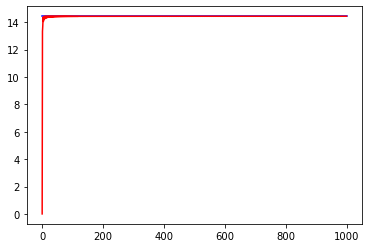

In [30]:
plt.plot(BS*np.ones(N),'b',CRR,'r')

CRR converge vers BS en n^-0.9899866817030428 si on prend les indices paires
CRR converge vers BS en n^-1.9224895995607219 si on prend les indices impaires


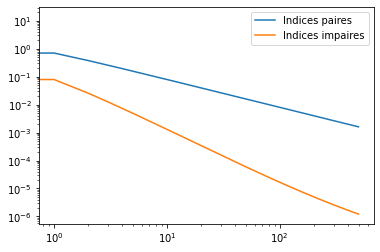

In [35]:
plt.loglog(abs(CRR[::2]-BS),label="Indices paires")
plt.loglog(abs(CRR[1::2]-BS),label="Indices impaires")
plt.legend()
arr = abs(CRR[::2]-BS)
arr2 = abs(CRR[1::2]-BS)
ordre = (np.log(arr[10])-np.log(arr[9]))/(np.log(10)-np.log(9))
ordre2 = (np.log(arr2[10])-np.log(arr2[9]))/(np.log(10)-np.log(9))
print(f"CRR converge vers BS en n^{ordre} si on prend les indices paires")
print(f"CRR converge vers BS en n^{ordre2} si on prend les indices impaires")